In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Trayectoria_Py_P as Trayectoria_Py
#import Trayectoria_Py

%matplotlib notebook

In [2]:
Trayectoria_Py?

In [3]:
import timeit

In [4]:
from PIL import Image

In [ ]:
"""
# Open the Xterm:
import os
os.system('xterm -T "Python Trayectoria" -fa monaco -fs 12 -bg black -fg green -geometry 100x30 -sl 100000 \
           -e "tty > Xterm_device ; bash --init-file Xterm_prompt " &')
"""

In [5]:
N1, N2 = 800, 800
ajedrez = np.zeros((N1,N2,3))

for i in np.arange(0,N1):
    for j in np.arange(0,N2):
        ajedrez[i,j,:] = (i//100 + j//100 + 1) % 2

In [6]:
ajedrez.shape

(800, 800, 3)

In [7]:
imagen = np.zeros((3000,6000,3))
imagen[0:N1,0:N2,:] = ajedrez

<IPython.core.display.Javascript object>


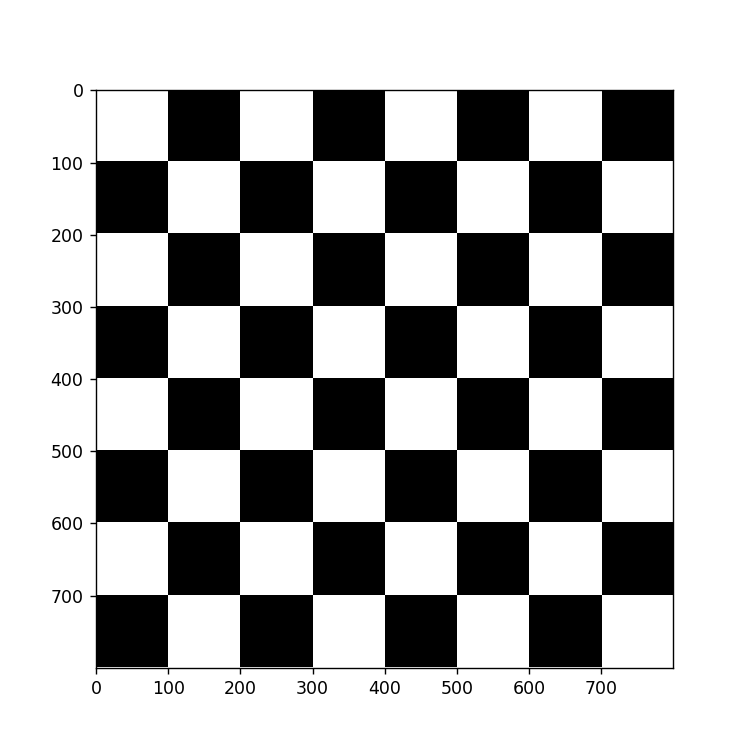

In [8]:
fig, axchess = plt.subplots(figsize=(6,6))
axchess.imshow(ajedrez)
plt.savefig("ajedrez.png")

<H2>¡ VAMOS !</H2>

In [ ]:
#Trayectoria_Py.xterm()

In [ ]:
#%history -g

In [121]:
# Msol en masas solares, R en km

Msolares   = 2.1
G      = 6.67384e-11*1e-9  # km**3 / (kg * s**2)     
c      = 299792.458 #  km/s
Ms     = 1.98847e30 #kg
Mskm   = G*Ms/c**2
M      = Msolares*Mskm
Radius = 2.9999*M
D = 7.714e15 #km -- 250 pc
R_max  = np.sqrt(3)*Radius+0.1
# alpha & beta en grados:
alpha = 90.
beta  = 0.
gamma = 60. #grados
b0 = 1e12 #gauss
Tpar = 4e5 #kelvin
Tperp = 3e5 #kelvin

In [122]:
print(Radius, "km")
print("Compacidad : ",Radius/M, "GM/c²")
print("chi_0 = ", Tperp/Tpar)

9.302067800077758 km
Compacidad :  2.9999 GM/c²
chi_0 =  0.75


In [123]:
# Initialize:
Trayectoria_Py.initialize(Msolares,Radius,R_max)
M    = Trayectoria_Py.star.m
Rinf = Trayectoria_Py.star.rinf
umax = Trayectoria_Py.star.umax
xc   = Trayectoria_Py.star.xc

xd     = Trayectoria_Py.detector.xd
thetad = Trayectoria_Py.detector.thetad

In [124]:
# Compute:
t2 = timeit.default_timer()
xt,yt,zt = Trayectoria_Py.compute(M,umax,xd,thetad)
t3 = timeit.default_timer() - t2
print(t3, ' segundos')

0.10134290100040744  segundos


In [125]:
# Incline:
t2 = timeit.default_timer()
thetae,phie = Trayectoria_Py.incline(Radius,alpha,xt,yt,zt)
t3 = timeit.default_timer() - t2
print(t3, ' segundos')

0.1167906050000056  segundos


In [126]:
#Curva de luz y espectro
Nmd2_99M = np.zeros(720)
for i in range(0,360):
    Tsup = Trayectoria_Py.temp(thetae,phie,gamma,float(i),Tpar,Tperp)
    Nmd2_99M[i] = Trayectoria_Py.nmagdip(Radius,D,Tsup)
for j in range(360,720):
    Nmd2_99M[j] = Nmd2_99M[j-360]

In [ ]:
Nspec25M90=[]
energies=np.linspace(0.1,1e9,360)
for E in energies:
    Nspec25M90.append(Trayectoria_Py.nspectenergy(Radius,D,Tsup[90],E))

In [ ]:
np.shape(Nspec25M)

In [ ]:
max(Nspec25M)

In [ ]:
Nspec25M=Nspec25M[:100]
figspec,axspec=plt.subplots(figsize=(6,6))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
axspec.plot(energies,Nspec25M)

<IPython.core.display.Javascript object>


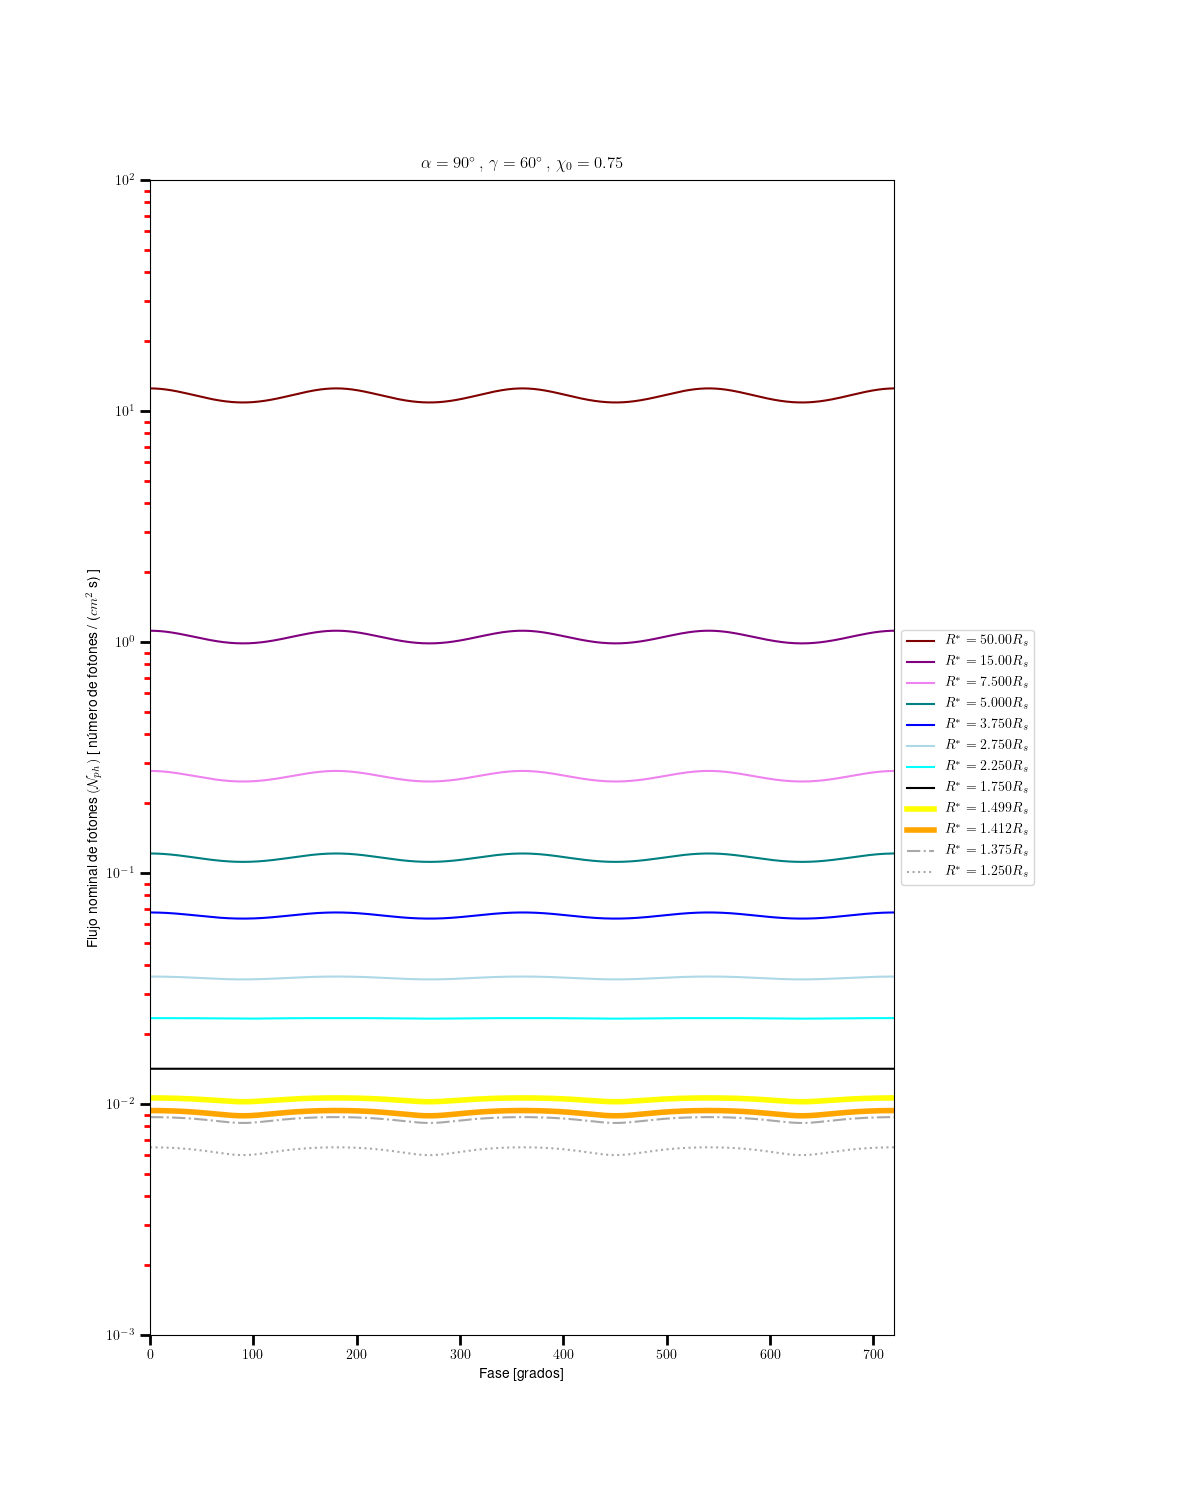

In [160]:
figphi,axphi=plt.subplots(figsize=(12,15))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
beta=np.linspace(0,720,720)
axphi.set_xlabel("Fase [grados]")
axphi.set_ylabel(r"Flujo nominal de fotones $(\mathcal{N}_{ph})$ [ número de fotones / ($cm^2$  s) ]")
axphi.set_xlim(0,720)

axphi.plot(beta,Nmd2_5M,label='$R^*=1.250R_s$', linestyle='dotted', color='darkgray')
axphi.plot(beta,Nmd2_75M,label='$R^*=1.375R_s$', linestyle='dashdot', color='darkgray')
axphi.plot(beta,Nmd2_82M,label='$R^*=1.412R_s$', linewidth=4, color='orange')
axphi.plot(beta,Nmd2_99M,label='$R^*=1.499R_s$', color='yellow', linewidth=4)
axphi.plot(beta,Nmd3_5M,label='$R^*=1.750R_s$', color='black')
axphi.plot(beta,Nmd4_5M,label='$R^*=2.250R_s$', color='cyan')
axphi.plot(beta,Nmd5_5M,label='$R^*=2.750R_s$', color='lightblue')
axphi.plot(beta,Nmd7_5M,label='$R^*=3.750R_s$', color='blue')
axphi.plot(beta,Nmd10_M,label='$R^*=5.000R_s$', color='teal')
axphi.plot(beta,Nmd15_M,label='$R^*=7.500R_s$', color='violet')
axphi.plot(beta,Nmd30_M,label='$R^*=15.00R_s$', color='purple')
axphi.plot(beta,Nmd100_M,label='$R^*=50.00R_s$', color='maroon')
#axphi.plot(beta,Nmd7M,label='$R^*=3.500R_s$')
#axphi.plot(beta,1.3*Nmd6M,label='$R^*=3.000R_s$')
#axphi.plot(beta,1.75*Nmd5M,label='$R^*=2.500R_s$')
#axphi.plot(beta,Nmd4_5M,label='$R^*=2.250R_s$')
#axphi.plot(beta,Nmd4_25M,label='$R^*=2.125R_s$')
#axphi.plot(beta,5*Nmd2_82M,label='$R^*=1.41R_s$')
#axphi.plot(beta,11*Nmd2_98M,label='$R^*=1.49R_s$')
#axphi.plot(beta,11*Nmd3_02M,label='$R^*=1.51R_s$')
#axphi.plot(beta,16*Nmd3_125M,label='$R^*=1.56R_s$')
#axphi.plot(beta,20*Nmd3_25M,label='$R^*=1.63R_s$')
#axphi.plot(beta,21*Nmd3_375M,label='$R^*=1.69R_s$')
#axphi.plot(beta,22*Nmd3_5M,label='$R^*=1.75R_s$')
#axphi.plot(beta,23*Nmd3_625M,label='$R^*=1.82R_s$')
#axphi.plot(beta,24*Nmd3_75M,label='$R^*=1.88R_s$')
#axphi.plot(beta,25*Nmd3_875M,label='$R^*=1.94R_s$')
#axphi.plot(beta,26*Nmd4_M,label='$R^*=2.00R_s$')
#axphi.plot(beta,19*Nmd5_M,label='$R^*=2.50R_s$')
#axphi.plot(beta,15*Nmd6_M,label='$R^*=3.00R_s$')
#axphi.plot(beta,10*Nmd8_M,label='$R^*=4.00R_s$')
#axphi.plot(beta,7.3*Nmd10_M,label='$R^*=5.00R_s$')
#axphi.plot(beta,1.3*Nmd25_M,label='$R^*=12.5R_s$')
#axphi.plot(beta,0.35*Nmd50_M,label='$R^*=25.0R_s$')
#axphi.plot(beta,0.00001*Nmd10000_M,label='$R^*=5\cdot10^3R_s$')
#axphi.plot(beta,0.8*Nmd2_75M,label='$R^*=1.375R_s$')
#axphi.plot(beta,0.8*Nmd2_5M,label='$R^*=1.250R_s$')
#axphi.plot(beta,0.8*Nmd2_25M,label='$R^*=1.125R_s$')
#axphi.plot(beta,Nmd25M,label='$R^*=1.2500R_s$')
#axphi.plot(beta,Nmd26M,label='$R^*=1.3000R_s$')
#axphi.plot(beta,Nmd27M,label='$R^*=1.3500R_s$')
#axphi.plot(beta,Nmd28M,label='$R^*=1.4000R_s$')
#axphi.plot(beta,Nmd2_90M,label='$R^*=1.45R_s$')
#axphi.plot(beta,Nmd2_98M,label='$R^*=1.49R_s$')
#axphi.plot(beta,Nmd30001M,label='$R^*=1.5001R_s$')
#axphi.plot(beta,Nmd315M,label='$R^*=1.5750R_s$')
#axphi.plot(beta,Nmd32M,label='$R^*=1.6000R_s$')
#axphi.plot(beta,Nmd321M,label='$R^*=1.6050R_s$')
#axphi.plot(beta,Nmd325M,label='$R^*=1.6250R_s$')
#axphi.plot(beta,Nmd33M,label='$R^*=1.6500R_s$')
#axphi.plot(beta,Nmd335M,label='$R^*=1.6750R_s$')
#axphi.plot(beta,Nmd34M,label='$R^*=1.7000R_s$')
#axphi.plot(beta,Nmd345M,label='$R^*=1.7250R_s$')
#axphi.plot(beta,Nmd355M,label='$R^*=1.7750R_s$')
#axphi.plot(beta,Nmd365M,label='$R^*=1.8250R_s$')
#axphi.plot(beta,Nmd37M,label='$R^*=1.8500R_s$')
#axphi.plot(beta,0.905*Nmd4M,label='$R^*=2.0000R_s$')
#axphi.plot(beta,0.735*Nmd45M,label='$R^*=2.2500R_s$')

box = axphi.get_position()
axphi.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [11,10,9,8,7,6,5,4,3,2,1,0]
#order = [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
  
# Put a legend to the right of the current axis
axphi.legend([handles[i] for i in order], [labels[i] for i in order],loc='center left', bbox_to_anchor=(1, 0.5))

from matplotlib.ticker import AutoMinorLocator, MultipleLocator
axphi.tick_params(which='both', width=2)
axphi.tick_params(which='major', length=7)
axphi.tick_params(which='minor', length=4, color='r')

axphi.set_ylim(0.001,100)
axphi.set_yscale('log')
axphi.set_title('$\\alpha=90^\circ\,,\,\gamma=60^{\circ}\,,\,\chi_0=0.75$')
plt.savefig('log_curvaluz_alpha90_gamma60_chi0_0_75.pdf')


In [ ]:
import pandas as pd

df01 = pd.DataFrame({'beta':beta, 'Nmd':Nmd2_82M})
df02 = pd.DataFrame({'beta':beta, 'Nmd':Nmd2_98M})
df03 = pd.DataFrame({'beta':beta, 'Nmd':Nmd3_02M})
df04 = pd.DataFrame({'beta':beta, 'Nmd':Nmd3_125M})
df05 = pd.DataFrame({'beta':beta, 'Nmd':Nmd3_25M})
df06 = pd.DataFrame({'beta':beta, 'Nmd':Nmd3_375M})
df07 = pd.DataFrame({'beta':beta, 'Nmd':Nmd3_5M})
df08 = pd.DataFrame({'beta':beta, 'Nmd':Nmd3_625M})
df09 = pd.DataFrame({'beta':beta, 'Nmd':Nmd3_75M})
df10 = pd.DataFrame({'beta':beta, 'Nmd':Nmd3_875M})
df11 = pd.DataFrame({'beta':beta, 'Nmd':Nmd4_M})
df12 = pd.DataFrame({'beta':beta, 'Nmd':Nmd5_M})
df13 = pd.DataFrame({'beta':beta, 'Nmd':Nmd6_M})
df14 = pd.DataFrame({'beta':beta, 'Nmd':Nmd8_M})
df15 = pd.DataFrame({'beta':beta, 'Nmd':Nmd10_M})
df16 = pd.DataFrame({'beta':beta, 'Nmd':Nmd25_M})
df17 = pd.DataFrame({'beta':beta, 'Nmd':Nmd50_M})
df18 = pd.DataFrame({'beta':beta, 'Nmd':Nmd10000_M})


df01.to_csv('Nmd2_82M.csv', index=False)
df02.to_csv('Nmd2_98M.csv', index=False)
df03.to_csv('Nmd3_02M.csv', index=False)
df04.to_csv('Nmd3_125M.csv', index=False)
df05.to_csv('Nmd3_25M.csv', index=False)
df06.to_csv('Nmd3_375M.csv', index=False)
df07.to_csv('Nmd3_5M.csv', index=False)
df08.to_csv('Nmd3_625M.csv', index=False)
df09.to_csv('Nmd3_75M.csv', index=False)
df10.to_csv('Nmd3_875M.csv', index=False)
df11.to_csv('Nmd4_M.csv', index=False)
df12.to_csv('Nmd5_M.csv', index=False)
df13.to_csv('Nmd6_M.csv', index=False)
df14.to_csv('Nmd8_M.csv', index=False)
df15.to_csv('Nmd10_M.csv', index=False)
df16.to_csv('Nmd25_M.csv', index=False)
df17.to_csv('Nmd50_M.csv', index=False)
df18.to_csv('Nmd10000_M.csv', index=False)

In [ ]:
u,phi = Trayectoria_Py.puntos.ua,Trayectoria_Py.puntos.phia

In [ ]:
figprueba,axprueba=plt.subplots(figsize=(5,5))
axprueba.scatter(u,phi[1])

In [ ]:
thetae[1::100]*180/np.pi

In [ ]:
figpr,axpr=plt.subplots(figsize=(5,5))
axpr.scatter(thetae[1::1]*180/np.pi,phie[1::1]*180/np.pi)
axpr.set_xlabel(r'$\theta_E$ [grados]')
axpr.set_ylabel(r'$\phi_E$ [grados]')
plt.title('Coordenadas en la estrella para $R^*=1.75R_s$')
plt.savefig('thetaephier1_75rs.pdf')

In [ ]:
figpr,axpr=plt.subplots(figsize=(5,5))
axpr.scatter(thetae[1::1]*180/np.pi,phie[1::1]*180/np.pi)
axpr.set_xlabel(r'$\theta_E$ [grados]')
axpr.set_ylabel(r'$\phi_E$ [grados]')
plt.title('Coordenadas en la estrella para $R^*=3.5R_s$')
plt.savefig('thetaephier3_5rs.pdf')

In [ ]:
figpr,axpr=plt.subplots(figsize=(5,5))
axpr.scatter(thetae[1::1]*180/np.pi,phie[1::1]*180/np.pi)
axpr.set_xlabel(r'$\theta_E$ [grados]')
axpr.set_ylabel(r'$\phi_E$ [grados]')
plt.title('Coordenadas en la estrella para $R^*=1.4999R_s$')
plt.savefig('thetaephier1_4999rs.pdf')

In [ ]:
figpr,axpr=plt.subplots(figsize=(5,5))
axpr.scatter(thetae[1::1]*180/np.pi,phie[1::1]*180/np.pi)
axpr.set_xlabel(r'$\theta_E$ [grados]')
axpr.set_ylabel(r'$\phi_E$ [grados]')
plt.title('Coordenadas en la estrella para $R^*=2.5R_s$')
plt.savefig('thetaephier2_5rs.pdf')

In [ ]:
#Transform

theta0 = np.linspace(0,2*np.pi,3600)
phi0   = np.linspace(0,2*np.pi,3600)

thetat=np.zeros((3600))
phit=np.zeros((3600))
xp=np.zeros((3600))
yp=np.zeros((3600))
zp=np.zeros((1000))

In [ ]:
phie[:,1]

In [ ]:
for i in range(0,999):
    xp[i]=Radius*np.cos(phi0[i])*np.sin(theta0[i])
    yp[i]=Radius*np.sin(phi0[i])*np.sin(theta0[i])
    zp[i]=Radius*np.cos(theta0[i])
    thetat[i],phit[i] = Trayectoria_Py.transform(Radius,xp[i],yp[i],zp[i])

In [ ]:
print('theta','\t','phi')
for i in range(0,999):
    print("%.4f" % theta0[i],'\t',"%.4f" % thetat[i])
    print("%.4f" % phi0[i],'\t',"%.4f" % phit[i])

In [ ]:
# Color:
t2 = timeit.default_timer()

Rmax=R_max
detector = Trayectoria_Py.color(Rinf,Rmax,xd,thetad,thetae,phie,imagen,N1,N2)

t3 = timeit.default_timer() - t2
print(t3, ' segundos')

In [ ]:
Umax = 1./2.5 

def xmax(Umax):
    if Umax<1/3:
        return 1.
    elif Umax >= 1/3:
        return 3*Umax*np.sqrt(3*(1-2*Umax))
    
print(Umax)
print(xmax(Umax))

In [ ]:
Trayectoria_Py.parameters.x0=0.99999*xmax(Umax)
Trayectoria_Py.parameters.umax=Umax

In [ ]:
kmax=Trayectoria_Py.trayectoria()[0]
u = Trayectoria_Py.trayectoria()[1][0:kmax+1]
phi = Trayectoria_Py.trayectoria()[2][1,0:kmax+1]

In [ ]:
print(phi)

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(M/u[-10:-1],phi[-10:-1]/(2*np.pi),'r.')
plt.axvline(M/Umax)
#plt.xlim(0.33,max(u)+0.001)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size" : 15,
    "font.sans-serif": ["Helvetica"]})
plt.title(r'$\phi(r)$')
plt.xlabel(r'$r$ [km]',fontsize=15)
plt.ylabel(r'$\phi\,/\,2\pi$      [Numero de vueltas]',fontsize=15)
plt.savefig('phi(u)cerca2.5M.png')
plt.show()

In [ ]:
np.shape(thetae)

In [ ]:
thetae[0][3000]

In [ ]:
th=np.sort(thetae,axis=None)    
tht=th.tolist()

In [ ]:
np.shape(tht)

In [ ]:
thetas = []
ks = []

for t in tht:
    k = tht.count(t)
    if t not in thetas:
        thetas.append(t)
        ks.append(k)

In [ ]:
thnew=[]

In [ ]:
for i in th:   
    if i not in thnew: 
        thnew.append(i)

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(thnew,np.cos(thnew))
plt.show()

<H2>Explore Results</H2>

In [ ]:
xt1, yt1, zt1 = np.copy(xt), np.copy(yt), np.copy(zt)
thetae1, phie1 = np.copy(thetae), np.copy(phie)
detector1 = np.copy(detector)

In [ ]:
xt2, yt2, zt2 = np.copy(xt), np.copy(yt), np.copy(zt)
thetae2, phie2 = np.copy(thetae), np.copy(phie)
detector2 = np.copy(detector)

In [ ]:
dxt = xt2-xt1
print('x:', dxt.min(), dxt.max())
dyt = yt2-yt1
print('y:', dyt.min(), dyt.max())
dzt = zt2-zt1
print('z:', dzt.min(), dzt.max())

In [ ]:
j=100
for i in range(xt1.shape[1]):
    print(i,xt1[1:,i,j], '     ', xt2[1:,i,j], '  ---------  ', yt1[1:,i,j], '     ', yt2[1:,i,j], '  ---------  ',  zt1[1:,i,j], '     ', zt2[1:,i,j])

In [ ]:
for i in range(thetae1.shape[1]):
    print(i,thetae1[i], '     ', thetae2[i])

<H2>Plot Figures</H2>

In [ ]:
det_pts = detector.shape[0]
dpi = 250
plg = det_pts/dpi
d=det_pts

In [ ]:
fig_see, ax_see = plt.subplots(figsize=(10,10))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "font.family" : "lmodern",
    "text.latex.unicode": True})
ax_see.imshow(detector)
ax_see.set_xticks([0, 0.5*d,d-0.5])
ax_see.set_xticklabels([r'$-R_{max}$',r"$0$",r'$R_{max}$'])
ax_see.set_yticks([0, 0.5*d,d-0.5])
ax_see.set_yticklabels([r'$R_{max}$',r"$0$",r'$-R_{max}$'])
ax_see.set_title(r"$R^*=20R_s$",color="blue")
plt.savefig("20Rs.png",dpi=dpi)